In [1]:
target_url = 'https://raw.githubusercontent.com/Cosmic-rare/result-database-jupyter/main/targets/fastlate.png'

In [13]:
import os
from PIL import Image
import pyocr
import pyocr.builders
import requests
import io
import matplotlib.pyplot as plt
import cv2

In [3]:
def openImg(url):
  return Image.open(io.BytesIO(requests.get(url).content))

In [4]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [5]:
img = openImg(target_url)
rgb_img = img.convert('RGB')
size = rgb_img.size

In [6]:
# crop_img = rgb_img.crop([0, size[1] / 2, size[0] / 3 * 2, size[1] / 8 * 7])

crop_img = rgb_img
crop_size = crop_img.size

In [9]:
# img2 = Image.new('RGBA', crop_size)

# border = 215

# for x in range(crop_size[0]):
#   for y in range(crop_size[1]):
#     r, g, b = crop_img.getpixel((x, y))

#     if border<r and border<g and border<b :
#         a = 0
#     else:
#         a = 225

#     img2.putpixel((x, y), (a, a, a, 255))

img2 = img

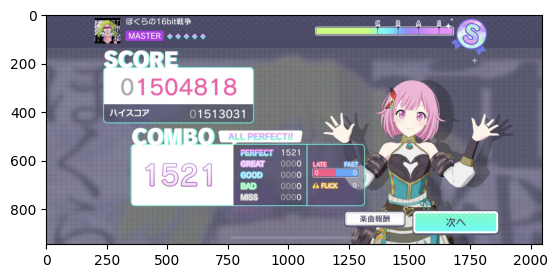

In [16]:
plt.imshow(img2)

In [11]:
builder = pyocr.builders.WordBoxBuilder (tesseract_layout=11)
# builder.tesseract_configs.append("-c")
# builder.tesseract_configs.append('tessedit_char_whitelist="COMBO"')
result = tool.image_to_string(crop_img, lang="eng", builder=builder)

In [14]:
imgimg = cv2.imread('../targets/fastlate.png')

for box in result:
    cv2.rectangle(imgimg, box.position[0], box.position[1], (0, 0, 255), 2)
    print("word: {}, pos: {}".format(box.content, box.position))

word: +, pos: ((1669, 17), (1682, 29))
word: bi, pos: ((270, 26), (307, 75))
word: [EK, pos: ((332, 17), (386, 44))
word: 50, pos: ((401, 18), (446, 44))
word: 16bitk, pos: ((460, 16), (599, 45))
word: Ss, pos: ((577, 12), (603, 56))
word: eA, pos: ((282, 83), (307, 102))
word: MASTER, pos: ((324, 65), (483, 121))
word: @¢¢0¢, pos: ((510, 81), (660, 104))
word: er, pos: ((280, 97), (307, 121))
word: 4’, pos: ((415, 193), (462, 218))
word: A), pos: ((1530, 334), (1623, 437))
word: YY, pos: ((1145, 406), (1275, 531))
word: e, pos: ((1756, 411), (1871, 524))
word: PERFECT, pos: ((802, 555), (941, 586))
word: 1521, pos: ((974, 556), (1048, 582))
word: SS, pos: ((1717, 584), (1757, 614))
word: 0000, pos: ((973, 602), (1054, 628))
word: 0000, pos: ((973, 648), (1054, 674))
word: mo, pos: ((1100, 606), (1294, 673))
word: ~~, pos: ((1417, 608), (1536, 675))
word: 0000, pos: ((971, 695), (1054, 721))
word: &, pos: ((1096, 689), (1114, 732))
word: FLICK, pos: ((1100, 693), (1206, 719))
word: ANN

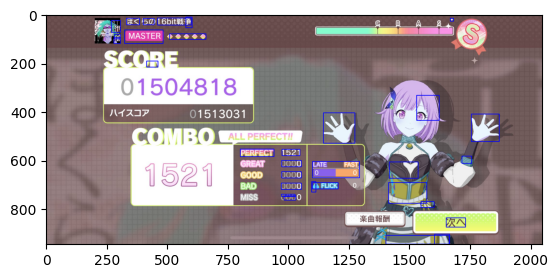

In [15]:
plt.imshow(imgimg)